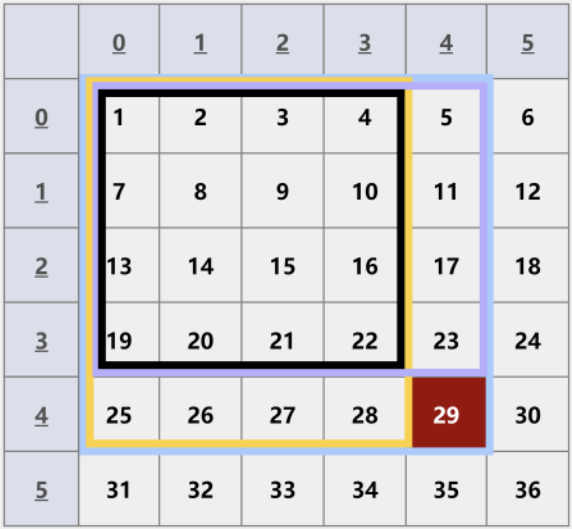

29的蓝色区域的所有数字之和 = 23格子代表的紫色区域的所有数字之和 + 28代表的黄色区域数字之和 - 22代表的黑色区域的所有数字之和 + 29这个格子内的值

for i in range(1,row+1):
            
            for j in range(1,col+1):
                
                self.dp[i][j]=self.dp[i][j-1]+self.dp[i-1][j]-self.dp[i-1][j-1]+matrix[i-1][j-1]


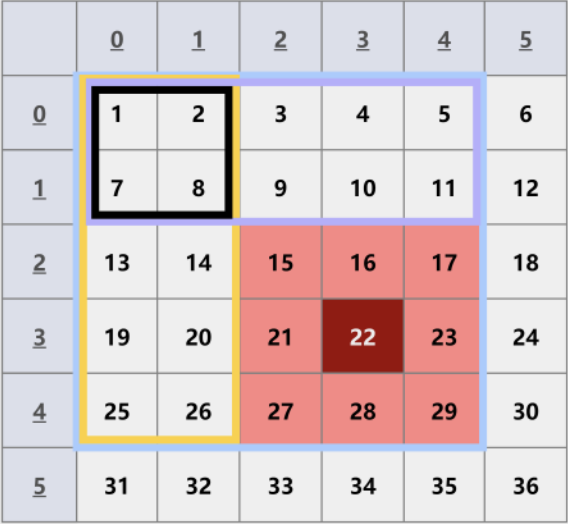

红色区域的数字之和 = 蓝色区域的数字之和 - 黄色区域之和 - 紫色区域之和 + 黑色区域之和

res[i][j] = dp[end_row][end_col] - dp[start_row][end_col] + dp[start_row][start_col] - dp[end_row][start_col]

In [ ]:
class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        if not matrix or not matrix[0]: return None
        row = len(matrix)
        col = len(matrix[0])
        self.dp = [[0]*(col+1) for _ in range(row+1)]
        for i in range(1,row+1):
            for j in range(1,col+1):
                self.dp[i][j]=self.dp[i][j-1]+self.dp[i-1][j]-self.dp[i-1][j-1]+matrix[i-1][j-1]
                
    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        return self.dp[row2+1][col2+1]-self.dp[row2+1][col1]-self.dp[row1][col2+1]+self.dp[row1][col1]


In [ ]:
class Solution:
    def matrixBlockSum(self, mat: List[List[int]], k: int) -> List[List[int]]:
        m,n = len(mat),len(mat[0])
        p = [[0]*(1+n) for _ in range(1+m)]
        # 二维前缀和
        for i in range(1,m+1):
            for j in range(1,n+1):
                p[i][j] = p[i-1][j]+p[i][j-1]-p[i-1][j-1]+mat[i-1][j-1]

        # 任意矩形和
        def get(x1,y1,x2,y2):
            return p[x2][y2] - p[x2][y1-1] - p[x1-1][y2] + p[x1-1][y1-1]

        # 计算基于i,j的区域和
        res = []
        for i in range(1,m+1):
            tmp = []
            for j in range(1,n+1):
                q = get(max(i-k,1),max(j-k,1),min(i+k,m),min(j+k,n))
                tmp.append(q)
            res.append(tmp)
        return res
                
''' without def get:    
        res = [[0] * col for _ in range(row)]
        for i in range(row):
            for j in range(col):
                start_row = 0  if i - k < 0 else i - k
                end_row = i + k + 1 if i + k + 1 < row else row
                start_col = 0  if j - k < 0 else j - k
                end_col = j + k + 1 if j + k + 1 < col else col
                res[i][j] = dp[end_row][end_col] - dp[start_row][end_col] + dp[start_row][start_col] - dp[end_row][start_col]
        return res
'''